In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from scipy.stats import randint
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [4]:
# Study data files
Airline_path = "data/Fixed_flight.csv"

Airline = pd.read_csv(Airline_path, header=0,  index_col=0)
Airline


C:\Users\Connor\anaconda3\envs\PythonData38\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,MONTH,DAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,DELAYED
0,1,1,AS,ANC,SEA,-11.0,0
1,1,1,AA,LAX,PBI,-8.0,0
2,1,1,US,SFO,CLT,-2.0,0
3,1,1,AA,LAX,MIA,-5.0,0
4,1,1,AS,SEA,ANC,-1.0,0
...,...,...,...,...,...,...,...
2889507,6,30,UA,LAX,ORD,-1.0,0
2889508,6,30,UA,LAX,IAH,90.0,1
2889509,6,30,UA,PDX,IAH,113.0,1
2889510,6,30,UA,SEA,IAH,13.0,1


In [5]:
X_cat = Airline[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']]
X_num = Airline.drop(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DELAYED'], axis=1)
X_num

,MONTH,DAY,DEPARTURE_DELAY
0,1,1,-11.0
1,1,1,-8.0
2,1,1,-2.0
3,1,1,-5.0
4,1,1,-1.0
...,...,...,...
2889507,6,30,-1.0
2889508,6,30,90.0
2889509,6,30,113.0
2889510,6,30,13.0


In [6]:
X_cat

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT
0,AS,ANC,SEA
1,AA,LAX,PBI
2,US,SFO,CLT
3,AA,LAX,MIA
4,AS,SEA,ANC
...,...,...,...
2889507,UA,LAX,ORD
2889508,UA,LAX,IAH
2889509,UA,PDX,IAH
2889510,UA,SEA,IAH


In [7]:
# Catagorize all the non number data (Flight locations, Airlines)
X_cat = pd.get_dummies(X_cat, drop_first=True)
X_cat

,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,...,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VEL,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2889507,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2889508,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2889509,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2889510,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Scale just the number data of the X-axis and add it to the catagorized dataframe as is.
# Make it your new X-axis with the Y-axis being delayed or not
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)
y = Airline['DELAYED']
X.head()

,MONTH,DAY,DEPARTURE_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,...,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VEL,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
0,-1.501547,-1.674222,-0.557705,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.501547,-1.674222,-0.479486,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.501547,-1.674222,-0.323048,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.501547,-1.674222,-0.401267,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.501547,-1.674222,-0.296975,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
from sklearn.model_selection import train_test_split

In [8]:
# Using AffinityPropgation to clean inf / nan values for logistic regression and following models to perform

#import pandas as pd
# from sklearn.cluster import AffinityPropagation


[        nan         nan         inf  1.13112014         inf         nan
  0.6470403  -1.12405211  0.7444443  -0.78549531 -0.65396024 -2.63552518
 -1.03404321  0.79768438 -0.29219341  0.18932261  1.19876277         inf
         inf  0.17387339]


In [17]:
# df = pd.DataFrame(Airline)

In [18]:
# df.replace([np.inf, -np.inf], np.nan, inplace=True)
# df = df.fillna(0)

In [19]:
# data = df.to_numpy()
# print(data)

[[1 1 'AS' ... 'SEA' -11.0 0]
 [1 1 'AA' ... 'PBI' -8.0 0]
 [1 1 'US' ... 'CLT' -2.0 0]
 ...
 [6 30 'UA' ... 'IAH' 113.0 1]
 [6 30 'UA' ... 'IAH' 13.0 1]
 [6 30 'UA' ... 'SJU' 8.0 1]]


In [21]:
# af= AffinityPropagation(random_state=5).fit(data)
# print(af.cluster_centers_)

ValueError: could not convert string to float: 'AS'

In [8]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression()
# classifier

LogisticRegression()

In [10]:
# classifier.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [25]:
# print(f"Training Data Score: {classifier.score(X_train, y_train)}")
# print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [11]:
# Train a Random Forest Classifier model and print the model score
# from sklearn.ensemble import RandomForestClassifier

In [12]:
# Scale the data
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
# randomForestClass = RandomForestClassifier(random_state=42)
# randomForestClass.fit(X_train, y_train)

In [ ]:
# print("RandomForestClassifier score: ", randomForestClass.score(X_test,y_test))

In [ ]:
# Create a RandomForestClassifier model, fit it to the data, and print the model's score.
# randomForestClass_scaled = RandomForestClassifier(random_state=0)
# randomForestClass_scaled.fit(X_train_scaled, y_train)
# print("RandomForestClassifier scaled score: ", randomForestClass_scaled.score(X_test_scaled, y_test))

In [10]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from scipy.stats import randint
from sklearn import metrics

In [11]:
Airline.columns

Index(['MONTH', 'DAY', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'DEPARTURE_DELAY', 'DELAYED'],
      dtype='object')

In [12]:
# Size for images
mpl.rcParams['figure.figsize'] = (17,10)
mpl.rcParams['font.size'] = 20

<AxesSubplot:>

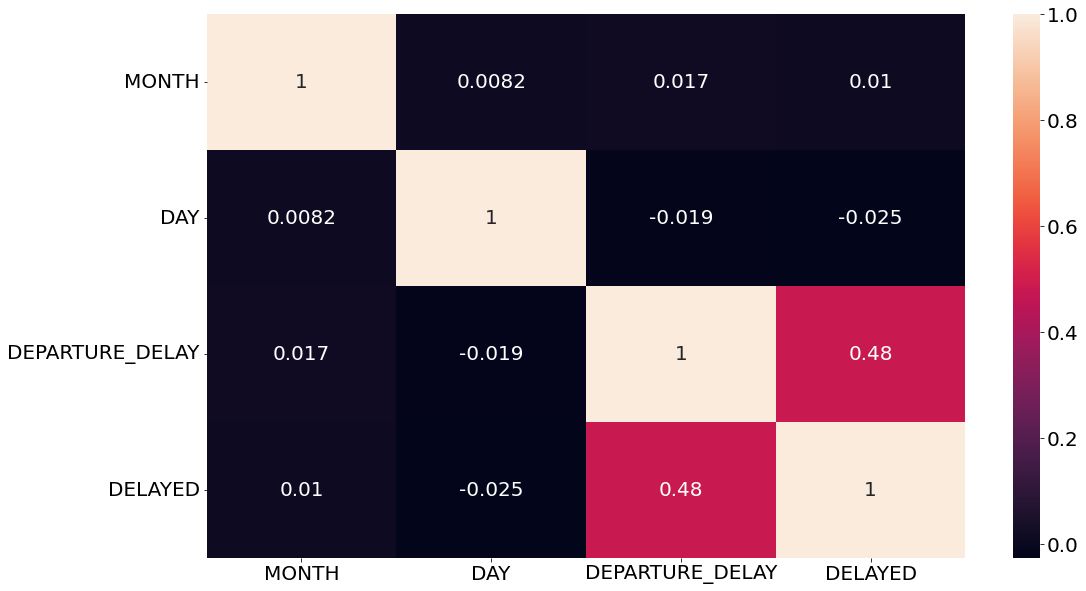

In [13]:
sns.heatmap(Airline.corr(), annot=True)

<AxesSubplot:xlabel='DAY', ylabel='count'>

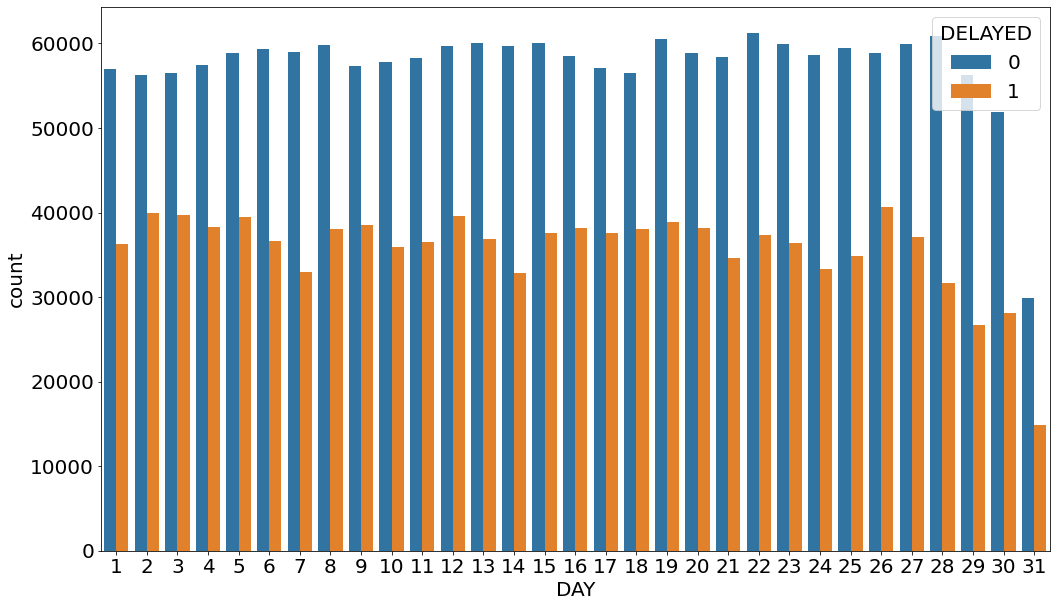

In [14]:
sns.countplot(data=Airline, x='DAY', hue='DELAYED')

In [15]:
Airline = pd.read_csv('Fixed_flight.csv', header=0,  index_col=1)
Airline.head()

C:\Users\Connor\anaconda3\envs\PythonData38\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Unnamed: 0,DAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,DELAYED
MONTH,,,,,,,
1,0,1,AS,ANC,SEA,-11.0,0
1,1,1,AA,LAX,PBI,-8.0,0
1,2,1,US,SFO,CLT,-2.0,0
1,3,1,AA,LAX,MIA,-5.0,0
1,4,1,AS,SEA,ANC,-1.0,0


In [16]:
# Delete id column
Airline = Airline.drop(columns = ['Unnamed: 0'])
Airline.head()

,DAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,DELAYED
MONTH,,,,,,
1,1,AS,ANC,SEA,-11.0,0
1,1,AA,LAX,PBI,-8.0,0
1,1,US,SFO,CLT,-2.0,0
1,1,AA,LAX,MIA,-5.0,0
1,1,AS,SEA,ANC,-1.0,0


In [17]:
# Bring only the nuemric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_column_names = Airline.select_dtypes(include=numerics).columns
print(numeric_column_names, '\n')

# Bring only the object columns (strings)
objects = 'object'
object_column_names = Airline.select_dtypes(include=objects).columns
print(object_column_names, '\n')

Index(['DAY', 'DEPARTURE_DELAY', 'DELAYED'], dtype='object') 

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'], dtype='object') 



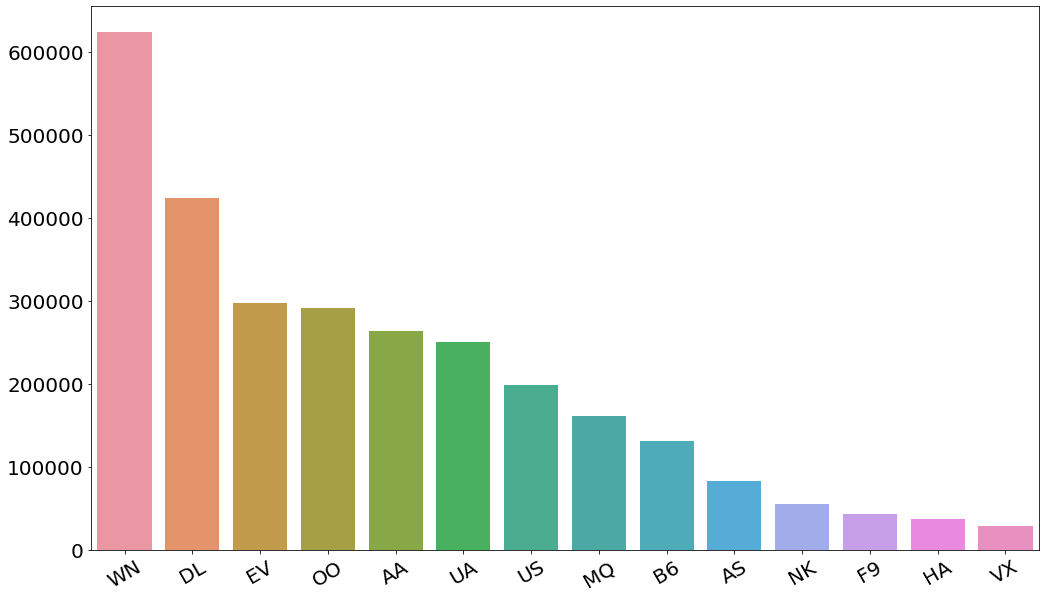

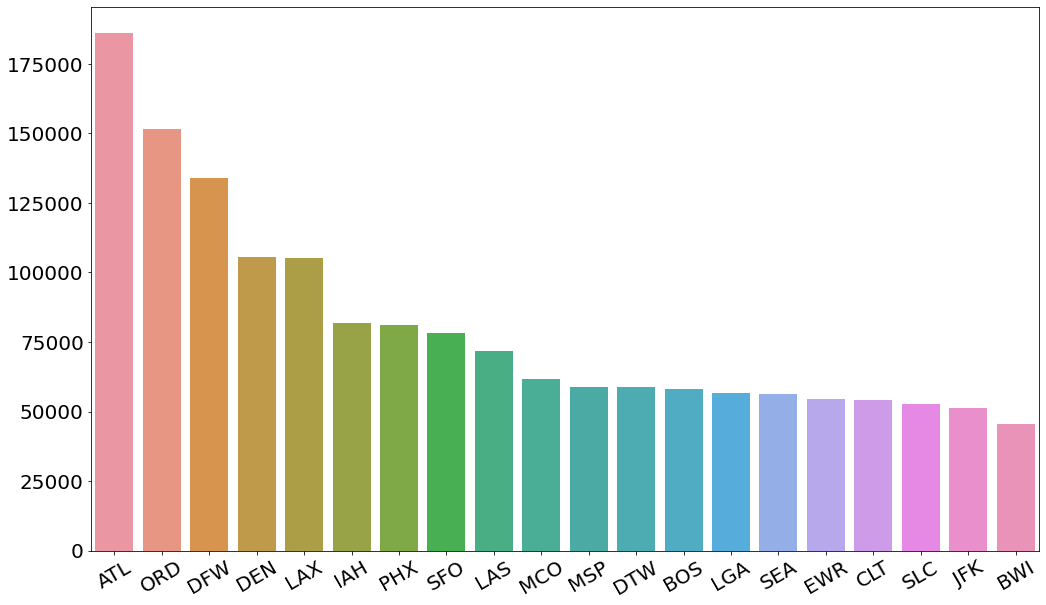

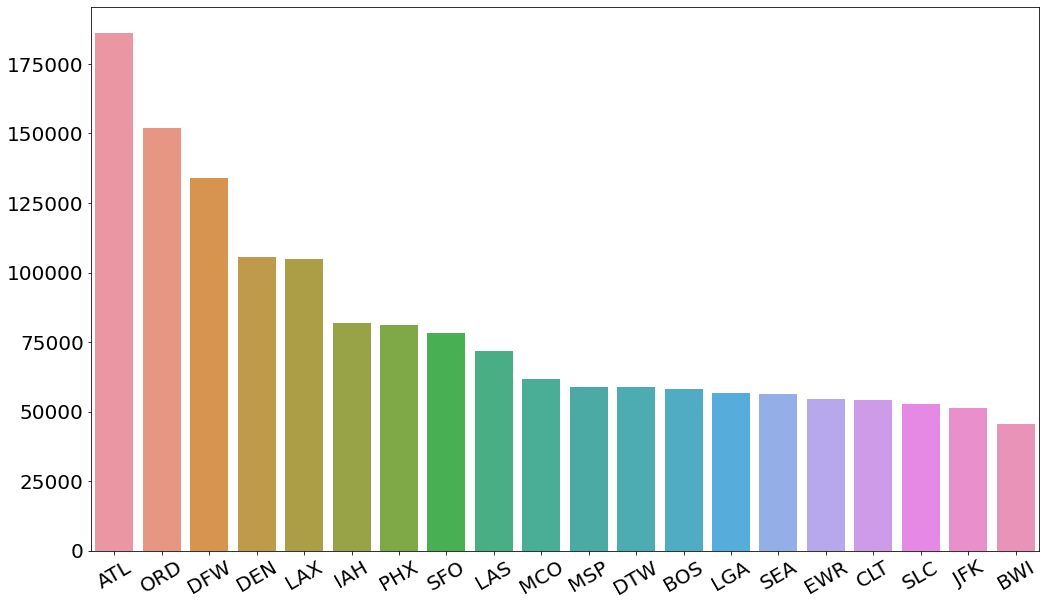

In [18]:
for column in object_column_names:
    value_counts_column =  Airline[column].value_counts()
    if value_counts_column.shape[0] > 20:
        value_counts_column = value_counts_column.sort_values(ascending = False)
        value_counts_column = value_counts_column[:20]
    ax = sns.barplot(y=value_counts_column.values, x=value_counts_column.index)
    ax = ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
    plt.show()

In [ ]:
kaggle kernels output jominjae/airline-delay-prediction-logistic-decisiontree -p /path/to/dest